# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
data_path=r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 4/04-2024 Instacart Basket Analysis/'

In [5]:
ords_prods_customers = pd.read_pickle(os.path.join(data_path,'02 Data','Prepared Data','orders_products_customers.pkl'))

In [4]:
ords_prods_customers.head() 

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_Name,gender,state,age,date_joined,number_of_fam_members,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


#### first_name and last_name columns can lead to a personal data, henc we need to remove it. 

In [6]:
# dropping first name and last name columns
ords_prods_customers.drop(['first_name', 'last_Name'], axis=1, inplace = True)

In [7]:
# checking if first name and last name are dropped.
ords_prods_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price_spent', 'Spending_flag',
       'ordering_median', 'Customer_order_frequency', 'gender', 'state', 'age',
       'date_joined', 'number_of_fam_members', 'marital_status', 'income',
       '_merge'],
      dtype='object')

### 3.A. Create a regional segmentation of the data

In [8]:
reg_Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [9]:
reg_Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [10]:
reg_South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
reg_West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
region = []
for value in ords_prods_customers['state']:
    if value in reg_Northeast:
        region.append('Northeast')
    elif value in reg_Midwest:
            region.append('Midwest')
    elif value in reg_South:
            region.append('South')
    elif value in reg_West:
            region.append('West')

In [13]:
# adding new column region to dataset 
ords_prods_customers['region'] = region

In [14]:
ords_prods_customers['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3. B. Determine whether there’s a difference in spending habits between the different U.S. regions

In [15]:
crosstab_region_spending = pd.crosstab(ords_prods_customers['region'], ords_prods_customers['Spending_flag'], dropna = False)

In [15]:
crosstab_region_spending

Spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [32]:
customer_activity = []
for value in ords_prods_customers['order_number']:
    if value < 5: 
        customer_activity.append("Low activity customer")
    elif value >=5: 
        customer_activity.append ("High activity customer")

In [33]:
ords_prods_customers['customer_activity'] = customer_activity

In [34]:
ords_prods_customers['customer_activity'].value_counts(dropna = False)

customer_activity
High activity customer    24414877
Low activity customer      7989982
Name: count, dtype: int64

In [19]:
# creating a df to include only high activity customers
df_high_active_customers = ords_prods_customers[ords_prods_customers['customer_activity'] == "High activity customer"]

In [20]:
ords_prods_customers.shape

(32404859, 32)

In [21]:
df_high_active_customers.shape

(24414877, 32)

In [22]:
df_high_active_customers.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'prod_ords_high_freq_customers.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [16]:
# creating age flag
ords_prods_customers.loc[(ords_prods_customers['age'] >= 18) & (ords_prods_customers['age'] <= 25),'age_group'] = 'Young Adult'
ords_prods_customers.loc[(ords_prods_customers['age'] >= 26) & (ords_prods_customers['age'] <= 40),'age_group'] = 'Adult'
ords_prods_customers.loc[(ords_prods_customers['age'] >= 41) & (ords_prods_customers['age'] <= 59),'age_group'] = 'Middle age'
ords_prods_customers.loc[(ords_prods_customers['age'] >= 60), 'age_group'] = 'Senior'


In [17]:
# finding income range in order to create proper income ranges
ords_prods_customers['income'].agg(['min','mean','max'])

min      25903.000000
mean     99437.733295
max     593901.000000
Name: income, dtype: float64

In [18]:
# creating income_range flag
ords_prods_customers.loc[(ords_prods_customers['income'] <= 26000),'income_range'] = 'Low income'
ords_prods_customers.loc[(ords_prods_customers['income'] >= 27000) & (ords_prods_customers['income'] <= 80000),'income_range'] = 'Medium income'
ords_prods_customers.loc[(ords_prods_customers['income'] > 80000),'income_range'] = 'high income'

In [19]:
ords_prods_customers['income_range'].value_counts(dropna= False)

income_range
high income      20830788
Medium income    11559312
nan                 14032
Low income            727
Name: count, dtype: int64

In [20]:
# creating flag for dependencies
ords_prods_customers.loc[(ords_prods_customers['number_of_fam_members'] > 0),'depandants_status'] = 'has depandants'
ords_prods_customers.loc[(ords_prods_customers['number_of_fam_members'] == 0),'depandants_status'] = 'no depandants'

In [21]:
ords_prods_customers['depandants_status'].value_counts(dropna = False)

depandants_status
has depandants    24307356
no depandants      8097503
Name: count, dtype: int64

## 6. Create an appropriate visualization to show the distribution of profiles.

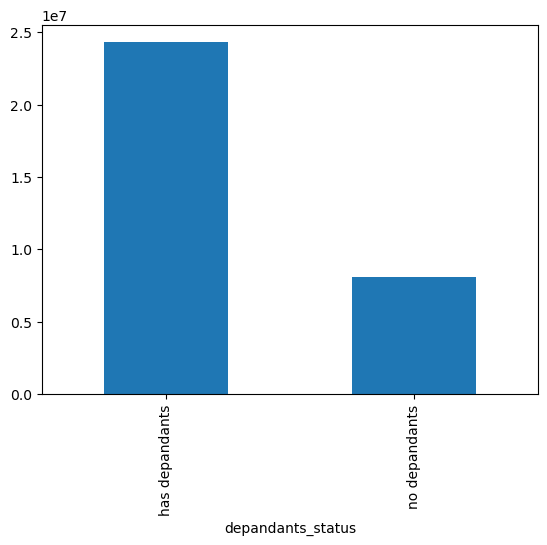

In [22]:
bar = ords_prods_customers['depandants_status'].value_counts().plot.bar()

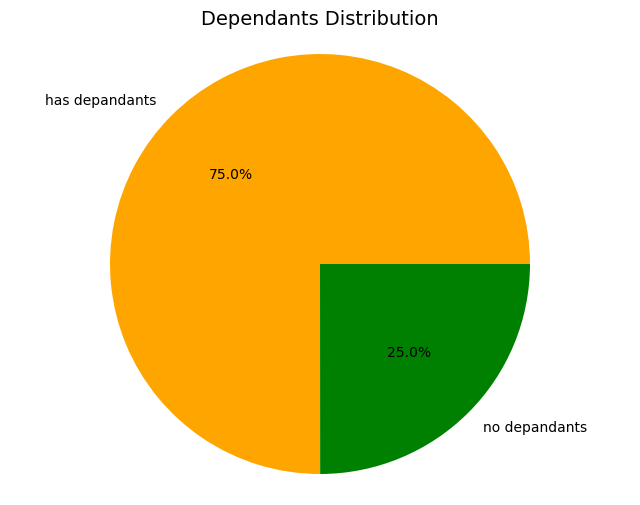

In [23]:
# from sample submissions I saw that I can also create pie charts, and here now I'm trying them and it looks better
depandants_status = (ords_prods_customers['depandants_status'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(depandants_status, labels=depandants_status.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue','red'])
plt.title('Dependants Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'pie_dependants_dis.png'))

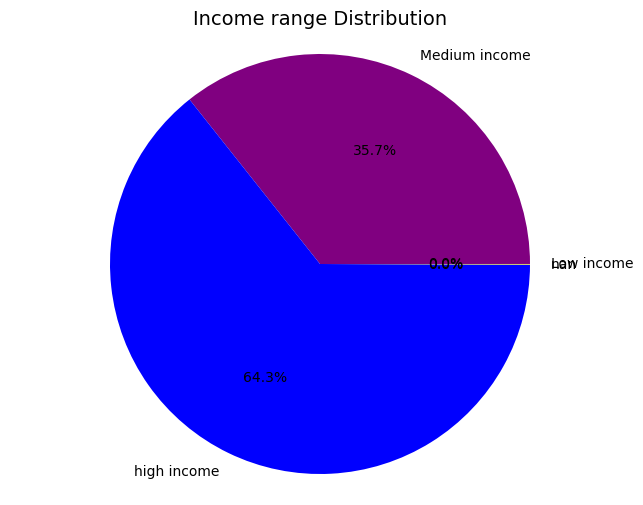

In [24]:
# Pie chart for income distribution
income_range = (ords_prods_customers['income_range'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8,6))  
plt.pie(income_range, labels=income_range.index, autopct='%1.1f%%', colors=['yellow', 'purple', 'blue','yellow'])
plt.title('Income range Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'income_range_pie.png'))

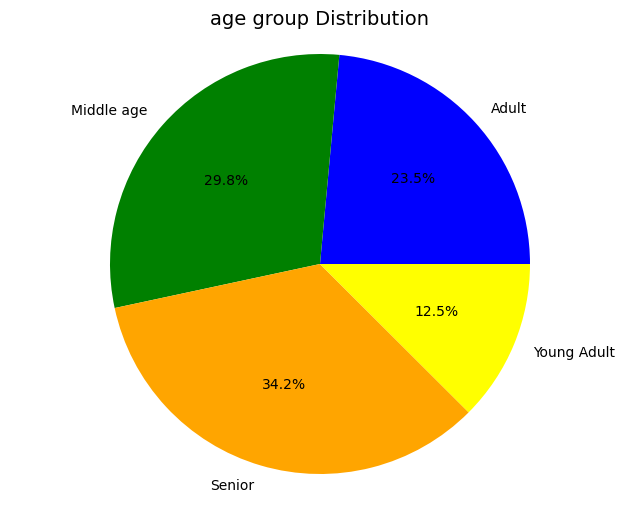

In [25]:
# pie chart for age group data distribution
age_group = (ords_prods_customers['age_group'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8,6))  
plt.pie(age_group, labels=age_group.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange','yellow'])
plt.title('age group Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'age_group_pie.png'))

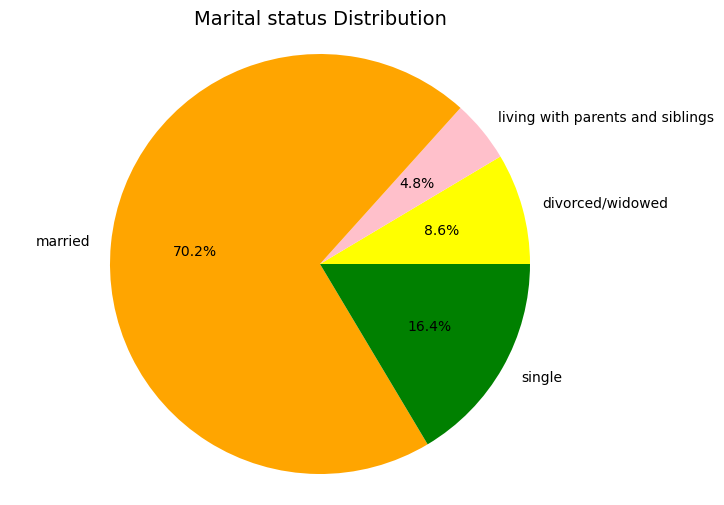

In [26]:
# pie chart for marital status distribution

marital_status = (ords_prods_customers['marital_status'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8,6))  
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', colors=['yellow', 'pink', 'orange','green'])
plt.title('Marital status Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'marital_status_pie.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [27]:
ords_prods_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price_spent', 'Spending_flag',
       'ordering_median', 'Customer_order_frequency', 'gender', 'state', 'age',
       'date_joined', 'number_of_fam_members', 'marital_status', 'income',
       '_merge', 'region', 'age_group', 'income_range', 'depandants_status'],
      dtype='object')

In [28]:
# comparing spending flag and aggregation of prices
spending_expenses = ords_prods_customers.groupby('Spending_flag').agg({'prices': ['mean', 'min', 'max']})

In [29]:
spending_expenses 

prices              
                     mean  min      max
Spending_flag                          
High spender   222.343698  1.0  99999.0
Low spender      7.780685  1.0     25.0

In [30]:
# comparing customer customer frequency and income aggregation

In [35]:
frequency_income = ords_prods_customers.groupby('customer_activity').agg({'income': ['mean', 'min', 'max']})

In [36]:
frequency_income

income               
                                mean    min     max
customer_activity                                  
High activity customer  99895.049838  25903  593901
Low activity customer   98040.317486  25903  593901

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [37]:
total_spending_region = ords_prods_customers.groupby(['region'])['prices'].sum()

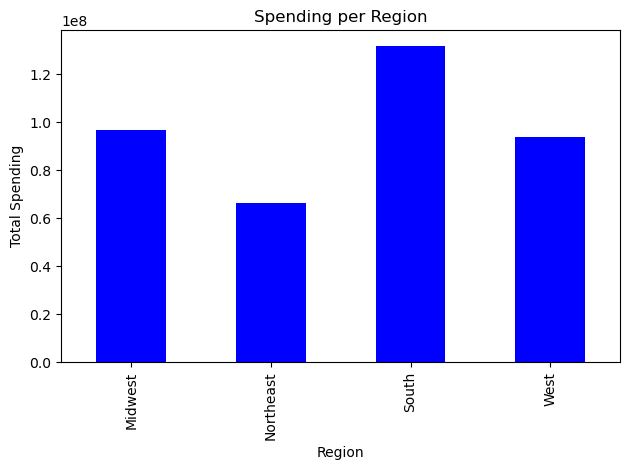

In [38]:
bar_total_spending_region = total_spending_region.sort_index().plot.bar(color='blue')
plt.title('Spending per Region')
plt.ylabel('Total Spending')
plt.xlabel('Region')
plt.tight_layout()

In [39]:
avg_income_per_region = ords_prods_customers.groupby(['region'])['income'].mean()

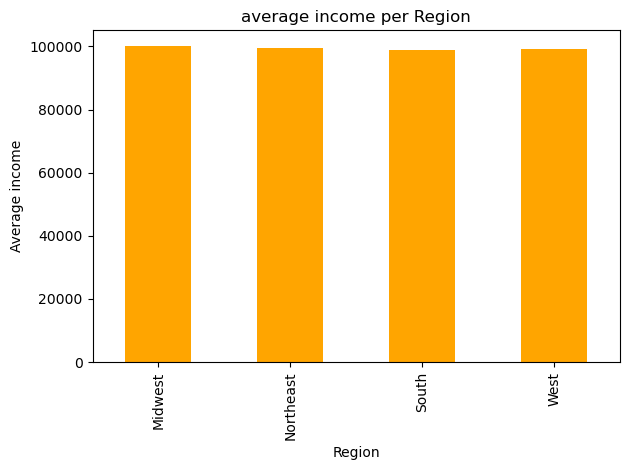

In [40]:
bar_avg_income_region = avg_income_per_region.sort_index().plot.bar(color='orange')
plt.title('average income per Region')
plt.ylabel('Average income')
plt.xlabel('Region')
plt.tight_layout()

In [41]:
# importing departments data to see the columns and values 
df_departments = pd.read_csv(os.path.join(data_path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [42]:
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [44]:
df_departments['department_id'].dtype

dtype('int64')

In [45]:
ords_prods_customers = ords_prods_customers.drop(columns=['_merge'])

In [46]:
#merging department table with ord_prods_customers
ords_prods_custs_depts = ords_prods_customers.merge(df_departments, on = 'department_id', indicator = True)

In [47]:
ords_prods_custs_depts.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,number_of_fam_members,marital_status,income,region,age_group,income_range,depandants_status,customer_activity,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,1,married,49620,Midwest,Senior,Medium income,has depandants,High activity customer,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,1,married,49620,Midwest,Senior,Medium income,has depandants,High activity customer,snacks,both
2,4913,Table Water Crackers,78,19,4.4,894221,138,prior,23,5,...,1,married,49620,Midwest,Senior,Medium income,has depandants,High activity customer,snacks,both
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,prior,7,0,...,1,married,49620,Midwest,Senior,Medium income,has depandants,High activity customer,snacks,both
4,13424,Almonds,45,19,4.2,3139998,138,prior,28,6,...,1,married,49620,Midwest,Senior,Medium income,has depandants,High activity customer,snacks,both


In [48]:
# creating some reports based on customer profiles and departments they use

In [49]:
expenses_departments = ords_prods_custs_depts.groupby(['department'])['prices'].sum()

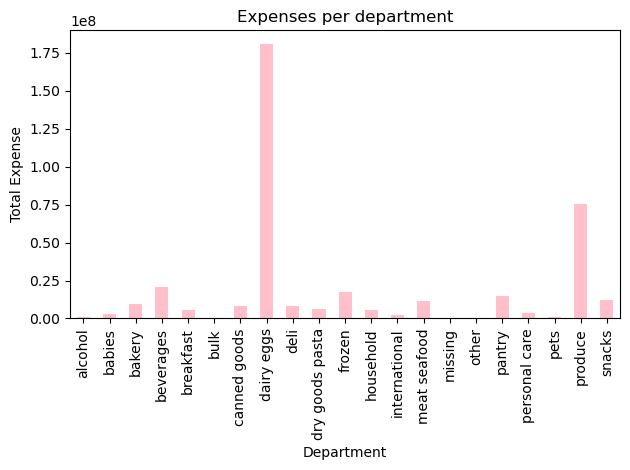

In [50]:
bar_expenses_departments = expenses_departments.sort_index().plot.bar(color='pink')
plt.title('Expenses per department')
plt.ylabel('Total Expense')
plt.xlabel('Department')
plt.tight_layout()

In [51]:
orders_departments = ords_prods_custs_depts.groupby(['department'])['order_number'].sum()

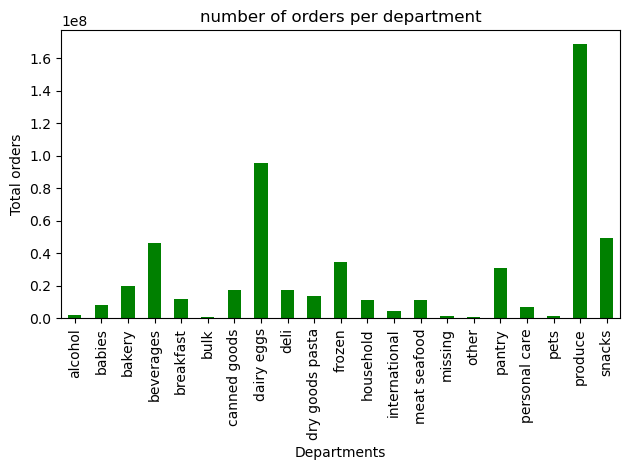

In [52]:
bar_orders_departments = orders_departments.sort_index().plot.bar(color='green')
plt.title('number of orders per department')
plt.ylabel('Total orders')
plt.xlabel('Departments')
plt.tight_layout()

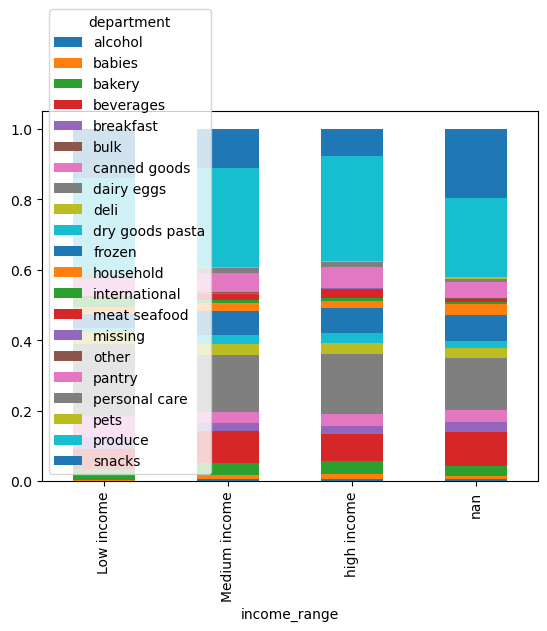

In [53]:
stacked_income_dep=pd.crosstab(ords_prods_custs_depts['income_range'],ords_prods_custs_depts['department'],normalize='index').plot.bar(stacked=True)

In [54]:
ords_prods_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price_spent', 'Spending_flag',
       'ordering_median', 'Customer_order_frequency', 'gender', 'state', 'age',
       'date_joined', 'number_of_fam_members', 'marital_status', 'income',
       'region', 'age_group', 'income_range', 'depandants_status',
       'customer_activity'],
      dtype='object')

# Additional queries to answer project questions

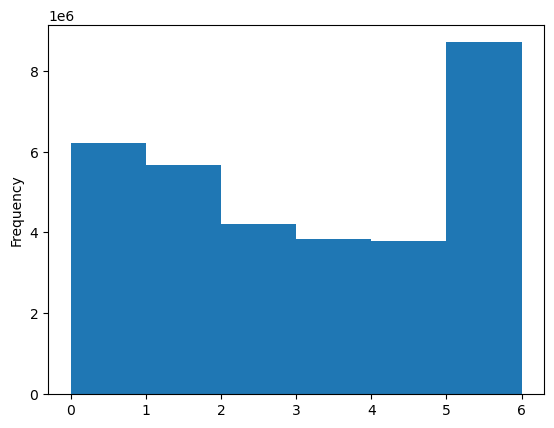

In [55]:
# finding busiest days of the week
hist = ords_prods_customers['order_dow'].plot.hist(bins = 6)

### profiling order_hours_of_day on new df ords_prods_custs_depts
##### this could have been done on the initial df before merging with departments.. 

In [56]:
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 0) & (ords_prods_custs_depts['order_hour_of_day'] <= 5),'day_hours'] = 'midnight'
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 6) & (ords_prods_custs_depts['order_hour_of_day'] <= 11),'day_hours'] = 'morning'
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 12) & (ords_prods_custs_depts['order_hour_of_day'] <= 14),'day_hours'] = 'noon'
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 15) & (ords_prods_custs_depts['order_hour_of_day'] <= 17),'day_hours'] = 'after noon'
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 17) & (ords_prods_custs_depts['order_hour_of_day'] <= 20),'day_hours'] = 'evening'
ords_prods_custs_depts.loc[(ords_prods_custs_depts['order_hour_of_day'] >= 21) & (ords_prods_custs_depts['order_hour_of_day'] <= 23),'day_hours'] = 'night'


In [61]:
day_hour_order = ords_prods_custs_depts.groupby(['day_hours'])['order_number'].sum()

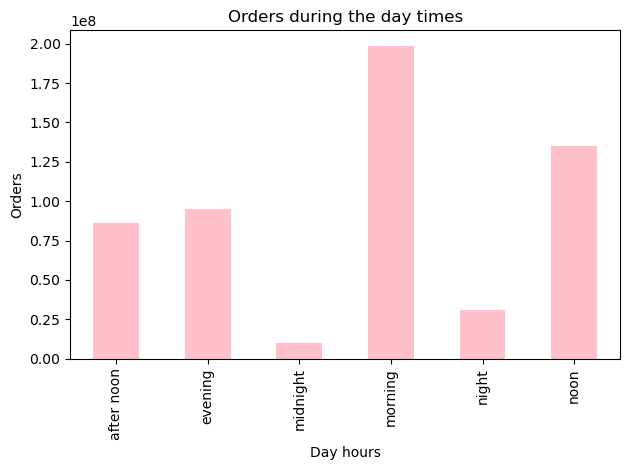

In [62]:
bar_day_hour_spend = day_hour_order.sort_index().plot.bar(color='pink')
plt.title('Orders during the day times')
plt.ylabel('Orders')
plt.xlabel('Day hours')
plt.tight_layout()

##### Mornings: hours between 6 - 11 am have the most orders

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [76]:
stacked_income_dep.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'income_department.png'))

In [78]:
bar_orders_departments.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'orders_department.png'))

In [79]:
bar_expenses_departments.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'expenses_department.png'))

In [80]:
bar_avg_income_region.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'avg_income_region.png'))

In [83]:
bar_total_spending_region.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'total_spending_region.png'))

## Exporting merged ord, prod, cust, and dept data to be used on the Key questions file


In [71]:
ords_prods_custs_depts.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'ord_prods_custs_depts.pkl'))